In [ ]:
#download plassembler (plsd) db
docker run -v $PWD:/data/ quay.io/biocontainers/plassembler:1.1.0--pyhdfd78af_0 plassembler download -d /data/databases/plassembler-db

#split contigs to separate files
docker run -v $PWD:/data/ quay.io/biocontainers/seqkit:2.4.0--h9ee0642_0 seqkit split -i /data/output/ERR10367379.dragonflye/contigs.fa
docker run -v $PWD:/data/ quay.io/biocontainers/seqkit:2.4.0--h9ee0642_0 seqkit split -i /data/output/ERR10367381.dragonflye/contigs.fa

#generate Mash sketches of each
docker run -v $PWD:/data/ quay.io/biocontainers/plassembler:1.1.0--pyhdfd78af_0 mash sketch /data/output/ERR10367379.dragonflye/contigs.fa.split/contigs.part_contig00002.fa -i
docker run -v $PWD:/data/ quay.io/biocontainers/plassembler:1.1.0--pyhdfd78af_0 mash sketch /data/output/ERR10367381.dragonflye/contigs.fa.split/contigs.part_contig00002.fa -i

#calculate Mash distances for each contig against plsd
docker run -v $PWD:/data/ quay.io/biocontainers/plassembler:1.1.0--pyhdfd78af_0 mash dist /data/output/ERR10367379.dragonflye/contigs.fa.split/contigs.part_contig00002.fa.msh /data/databases/plassembler-db/plsdb.msh -v 0.1 -d 0.1 -i >test.data.results/ERR10367379.dragonflye.contig00002.msh.plsdb.output.tsv
docker run -v $PWD:/data/ quay.io/biocontainers/plassembler:1.1.0--pyhdfd78af_0 mash dist /data/output/ERR10367381.dragonflye/contigs.fa.split/contigs.part_contig00002.fa.msh /data/databases/plassembler-db/plsdb.msh -v 0.1 -d 0.1 -i >test.data.results/ERR10367381.dragonflye.contig00002.msh.plsdb.output.tsv



#run plassembler
mamba install -c bioconda plassembler
mkdir databases/
plassembler download -d databases/plassembler-db
ln -s /opt/conda/bin/NanoFilt /opt/conda/bin/nanofilt
plassembler.py -t 8 -l fastq/SAMEA3181514/LR/combined.fastq.gz -1 fastq/SAMEA3181514/SR/ERR885453/ERR885453_1.fastq.gz -2 fastq/SAMEA3181514/SR/ERR885453/ERR885453_2.fastq.gz --outdir fastq/SAMEA3181514/plassembler.output -d databases/plassembler-db/ -c 1000000 -f
plassembler.py -t 8 -l fastq/SAMEA3726392/LR/ERR1341572/ERR1341572.fastq.gz -1 fastq/SAMEA3726392/SR/ERR1539195/ERR1539195_1.fastq.gz -2 fastq/SAMEA3726392/SR/ERR1539195/ERR1539195_2.fastq.gz --outdir fastq/SAMEA3726392/plassembler.output -d databases/plassembler-db/ -c 1000000 -f
#tried plassembler with SAMEA3726392 - but failed, LR are too low depth? rerun with unicycler
unicycler -1 fastq/SAMEA3726392/SR/ERR1539195/ERR1539195_1.fastq.gz -2 fastq/SAMEA3726392/SR/ERR1539195/ERR1539195_2.fastq.gz -l fastq/SAMEA3726392/LR/ERR1341572/ERR1341572.fastq.gz --threads 8 -o fastq/SAMEA3726392/unicycler.output

In [1]:
import pandas as pd

In [19]:
ERR10367379= pd.read_csv("test.data.results/ERR10367379.dragonflye.contig00002.msh.plsdb.output.tsv",sep="\t",header=None)
ERR10367381= pd.read_csv("test.data.results/ERR10367381.dragonflye.contig00002.msh.plsdb.output.tsv",sep="\t",header=None)
plsdb=pd.read_csv("databases/plassembler-db/plsdb.tsv",sep="\t",low_memory=False)

In [4]:
ERR10367379.sort_values([2], ascending=True)

,0,1,2,3,4
855,contig00002,NZ_CP031815.1,0.001680,0,933/1000
3,contig00002,NZ_CP035203.1,0.010697,0,665/1000
538,contig00002,NZ_LR890752.1,0.016499,0,547/1000
130,contig00002,NZ_LR890354.1,0.016612,0,545/1000
315,contig00002,NZ_LR890287.1,0.022784,0,449/1000
...,...,...,...,...,...
796,contig00002,NZ_CP036447.1,0.099470,0,66/1000
197,contig00002,NZ_CP024882.1,0.099470,0,66/1000
89,contig00002,NZ_CP026274.1,0.099470,0,66/1000
752,contig00002,NZ_CP047337.1,0.099470,0,66/1000


In [5]:
ERR10367381.sort_values([2], ascending=True)

,0,1,2,3,4
24,contig00002,LR890268.1,0.000533,0,978/1000
611,contig00002,NZ_CP015754.1,0.000706,0,971/1000
429,contig00002,NZ_CP016160.1,0.000706,0,971/1000
342,contig00002,NZ_KY454639.1,0.000806,0,967/1000
534,contig00002,NZ_CP026161.1,0.000831,0,966/1000
...,...,...,...,...,...
0,contig00002,NZ_CP054255.1,0.098138,0,68/1000
487,contig00002,NZ_CP069964.1,0.098798,0,67/1000
610,contig00002,NZ_CP022662.1,0.098798,0,67/1000
32,contig00002,LR890478.1,0.098798,0,67/1000


In [6]:
ERR10367379[ERR10367379[1].isin(ERR10367381[1])].sort_values([2], ascending=True)

,0,1,2,3,4
21,contig00002,NZ_CP031790.1,0.062899,0,154/1000
496,contig00002,NZ_LR890711.1,0.066857,0,140/1000
309,contig00002,NZ_CP073379.1,0.067458,0,138/1000
583,contig00002,NZ_CP025577.1,0.067458,0,138/1000
404,contig00002,NZ_CP051491.1,0.067763,0,137/1000
...,...,...,...,...,...
283,contig00002,NZ_CP040123.1,0.097487,0,69/1000
854,contig00002,NZ_CP021166.1,0.097487,0,69/1000
49,contig00002,CP018460.1,0.098138,0,68/1000
232,contig00002,NZ_CP020508.1,0.098138,0,68/1000


In [8]:
ERR10367381[ERR10367381[1].isin(ERR10367379[1])].sort_values([2], ascending=True)

,0,1,2,3,4
200,contig00002,NZ_CP063931.1,0.038839,0,284/1000
384,contig00002,NZ_CP063872.1,0.039366,0,280/1000
28,contig00002,NZ_CP031790.1,0.044248,0,246/1000
228,contig00002,NZ_LR890475.1,0.048386,0,221/1000
394,contig00002,NZ_CP065834.1,0.049829,0,213/1000
...,...,...,...,...,...
392,contig00002,NZ_MN200130.1,0.096215,0,71/1000
486,contig00002,CP031811.1,0.097487,0,69/1000
667,contig00002,NZ_CP018670.1,0.097487,0,69/1000
720,contig00002,NZ_CP075288.1,0.098138,0,68/1000


In [7]:
plsdb[plsdb['ACC_NUCCORE'].isin(['LR890268.1','NZ_CP031815.1','NZ_CP063931.1','NZ_CP031790.1'])]

,UID_NUCCORE,ACC_NUCCORE,Description_NUCCORE,CreateDate_NUCCORE,Topology_NUCCORE,Completeness_NUCCORE,TaxonID_NUCCORE,Genome_NUCCORE,Length_NUCCORE,Source_NUCCORE,...,hitscount_rMLST,inclusions,Host_BIOSAMPLE_processed,Host_DISEASE_processed,D1,D2,plasmidfinder,pmlst,relaxase_type(s),mpf_type
1565,1927384375,LR890268.1,Klebsiella pneumoniae isolate KSB1_7G-sc-22802...,2020/10/30,circular,complete,573,plasmid,165353,INSDC,...,0,NaN,NaN,NaN,3.319604,9.379559,"IncFIB(K)(pCAV1099-114)_1, CP011596, |IncFII(p...",IncF RST(K10:A-:B-):FIA(~21);FIB(-);FIC(-);FII...,"MOBF,MOBF",MPF_F
22847,1468502353,NZ_CP031790.1,Klebsiella pneumoniae strain KSB1_1I-sc-228028...,2018/09/02,circular,complete,573,plasmid,213061,RefSeq,...,0,NaN,NaN,NaN,3.277634,9.419069,"repB_KLEB_VIR, AP006726,",NaN,MOBH,MPF_F
22855,1468494813,NZ_CP031815.1,Klebsiella pneumoniae strain KSB1_7F-sc-228026...,2018/09/02,circular,complete,573,plasmid,139276,RefSeq,...,0,NaN,NaN,NaN,3.208491,9.847485,"IncFIB(K)(pCAV1099-114)_1, CP011596,",IncF RST(F-:A-:B-):FIA(-);FIB(-);FIC(-);FII(-)...,NaN,NaN
31489,1930684479,NZ_CP063931.1,Klebsiella pneumoniae strain M186-2 plasmid pM...,2020/11/10,circular,complete,573,plasmid,191041,RefSeq,...,0,NaN,NaN,NaN,3.270083,9.371028,"IncHI1B(pNDM-MAR)_1, JN420336, |repB_KLEB_VIR,...",IncHI1 MLST(-):HCM1_043(-);HCM1_064(-);HCM1_09...,MOBH,MPF_F


In [6]:
mashtree_matrix= pd.read_csv("miniasm.matrix.tsv",sep="\t")
mashtree_matrix.columns.values[0]='First'
mashtree_matrix=mashtree_matrix.set_index('First')
mashtree_3col = mashtree_matrix.stack().reset_index()
mashtree_3col.columns = ['contig1','contig2','dist']
mashtree_3col_refined = mashtree_3col.loc[(mashtree_3col.dist<0.1) & (mashtree_3col.dist != 0)]
mashtree_3col_refined.sort_values("dist")

,contig1,contig2,dist
143,SAMEA3726392.dragonflye.miniasmcontig00014,SAMEA3181514.dragonflye.miniasmcontig00012,0.058800
923,SAMEA3181514.dragonflye.miniasmcontig00012,SAMEA3726392.dragonflye.miniasmcontig00014,0.058800
1029,SAMEA3726392.dragonflye.miniasmcontig00011,SAMEA3181514.dragonflye.miniasmcontig00009,0.060969
1185,SAMEA3181514.dragonflye.miniasmcontig00009,SAMEA3726392.dragonflye.miniasmcontig00011,0.060969
674,SAMEA3726392.dragonflye.miniasmcontig00007,SAMEA3181514.dragonflye.miniasmcontig00006,0.061455
1376,SAMEA3181514.dragonflye.miniasmcontig00006,SAMEA3726392.dragonflye.miniasmcontig00007,0.061455
470,SAMEA3181514.dragonflye.miniasmcontig00016,SAMEA3726392.dragonflye.miniasmcontig00016,0.072203
1211,SAMEA3726392.dragonflye.miniasmcontig00016,SAMEA3181514.dragonflye.miniasmcontig00016,0.072203
47,SAMEA3181514.dragonflye.miniasmcontig00007,SAMEA3726392.dragonflye.miniasmcontig00009,0.092849
281,SAMEA3726392.dragonflye.miniasmcontig00009,SAMEA3181514.dragonflye.miniasmcontig00007,0.092849


In [13]:
mashtree_contigs= pd.read_csv("miniasm.contigs.stats.tsv",sep="\t")
mashtree_contigs.loc[(mashtree_contigs.file == "/data/test.data.results/SAMEA3726392.dragonflye.miniasm/contigs.fa.split/SAMEA3726392.dragonflye.miniasmcontig00016.fa") | (mashtree_contigs.file =="/data/test.data.results/SAMEA3181514.dragonflye.miniasm/contigs.fa.split/SAMEA3181514.dragonflye.miniasmcontig00016.fa")]

,file,format,type,num_seqs,sum_len,min_len,avg_len,max_len,Q1,Q2,Q3,sum_gap,N50,Q20(%),Q30(%),GC(%)
15,/data/test.data.results/SAMEA3181514.dragonfly...,FASTA,DNA,1,67566,67566,67566.0,67566,67566.0,67566.0,67566.0,0,67566,0.0,0.0,51.45
35,/data/test.data.results/SAMEA3726392.dragonfly...,FASTA,DNA,1,62160,62160,62160.0,62160,62160.0,62160.0,62160.0,0,62160,0.0,0.0,50.66


In [14]:
!docker run -v $PWD:/data/ quay.io/biocontainers/plassembler:1.1.0--pyhdfd78af_0 mash sketch /data/test.data.results/SAMEA3726392.dragonflye.miniasm/contigs.fa.split/SAMEA3726392.dragonflye.miniasmcontig00016.fa -i
!docker run -v $PWD:/data/ quay.io/biocontainers/plassembler:1.1.0--pyhdfd78af_0 mash sketch /data/test.data.results/SAMEA3181514.dragonflye.miniasm/contigs.fa.split/SAMEA3181514.dragonflye.miniasmcontig00016.fa -i
!docker run -v $PWD:/data/ quay.io/biocontainers/plassembler:1.1.0--pyhdfd78af_0 mash dist /data/test.data.results/SAMEA3181514.dragonflye.miniasm/contigs.fa.split/SAMEA3181514.dragonflye.miniasmcontig00016.fa.msh /data/databases/plassembler-db/plsdb.msh -v 0.1 -d 0.1 -i >test.data.results/SAMEA3181514.dragonflye.miniasmcontig00016.fa.msh.plsdb.output.tsv
!docker run -v $PWD:/data/ quay.io/biocontainers/plassembler:1.1.0--pyhdfd78af_0 mash dist /data/test.data.results/SAMEA3726392.dragonflye.miniasm/contigs.fa.split/SAMEA3726392.dragonflye.miniasmcontig00016.fa.msh /data/databases/plassembler-db/plsdb.msh -v 0.1 -d 0.1 -i >test.data.results/SAMEA3726392.dragonflye.miniasmcontig00016.fa.msh.plsdb.output.tsv


mash: Relink `/usr/local/bin/../lib/./libgfortran.so.5' with `/lib/x86_64-linux-gnu/librt.so.1' for IFUNC symbol `clock_gettime'
Sketching /data/test.data.results/SAMEA3726392.dragonflye.miniasm/contigs.fa.split/SAMEA3726392.dragonflye.miniasmcontig00016.fa...
Writing to /data/test.data.results/SAMEA3726392.dragonflye.miniasm/contigs.fa.split/SAMEA3726392.dragonflye.miniasmcontig00016.fa.msh...
mash: Relink `/usr/local/bin/../lib/./libgfortran.so.5' with `/lib/x86_64-linux-gnu/librt.so.1' for IFUNC symbol `clock_gettime'
Sketching /data/test.data.results/SAMEA3181514.dragonflye.miniasm/contigs.fa.split/SAMEA3181514.dragonflye.miniasmcontig00016.fa...
Writing to /data/test.data.results/SAMEA3181514.dragonflye.miniasm/contigs.fa.split/SAMEA3181514.dragonflye.miniasmcontig00016.fa.msh...
mash: Relink `/usr/local/bin/../lib/./libgfortran.so.5' with `/lib/x86_64-linux-gnu/librt.so.1' for IFUNC symbol `clock_gettime'
mash: Relink `/usr/local/bin/../lib/./libgfortran.so.5' with `/lib/x86_64-l

In [15]:
SAMEA3181514_miniasmcontig00016= pd.read_csv("test.data.results/SAMEA3181514.dragonflye.miniasmcontig00016.fa.msh.plsdb.output.tsv",sep="\t",header=None)
SAMEA3726392_miniasmcontig00016= pd.read_csv("test.data.results/SAMEA3726392.dragonflye.miniasmcontig00016.fa.msh.plsdb.output.tsv",sep="\t",header=None)


In [16]:
SAMEA3181514_miniasmcontig00016.sort_values(2,ascending=True)

,0,1,2,3,4
186,contig00016,NZ_LN864821.1,0.012587,0,623/1000
258,contig00016,NZ_CP068920.1,0.012587,0,623/1000
355,contig00016,NZ_CP022153.1,0.012587,0,623/1000
274,contig00016,NZ_CP068879.1,0.012635,0,622/1000
237,contig00016,NZ_CP068298.1,0.012635,0,622/1000
...,...,...,...,...,...
139,contig00016,NZ_KX807610.1,0.090931,0,80/1000
223,contig00016,NZ_CP027154.1,0.094378,0,74/1000
328,contig00016,CP070394.1,0.098138,0,68/1000
34,contig00016,NZ_CP068344.1,0.098798,0,67/1000


In [17]:
SAMEA3726392_miniasmcontig00016.sort_values(2,ascending=True)

,0,1,2,3,4
0,contig00016,NZ_CP068902.1,0.067458,0,138/1000
36,contig00016,NZ_CP041085.1,0.067458,0,138/1000
40,contig00016,NZ_MT989343.1,0.067458,0,138/1000
198,contig00016,NZ_CP068908.1,0.067458,0,138/1000
196,contig00016,NZ_CP068871.1,0.067458,0,138/1000
...,...,...,...,...,...
140,contig00016,NZ_MH722219.1,0.098798,0,67/1000
35,contig00016,NZ_LC556219.1,0.099470,0,66/1000
104,contig00016,NZ_KU315015.1,0.099470,0,66/1000
46,contig00016,NZ_CP045282.1,0.099470,0,66/1000


In [20]:
plsdb[plsdb['ACC_NUCCORE'].isin(['NZ_LN864821.1','NZ_CP068902.1','NZ_CP068920.1','NZ_CP041085.1'])].sort_values("Length_NUCCORE",ascending=False)

,UID_NUCCORE,ACC_NUCCORE,Description_NUCCORE,CreateDate_NUCCORE,Topology_NUCCORE,Completeness_NUCCORE,TaxonID_NUCCORE,Genome_NUCCORE,Length_NUCCORE,Source_NUCCORE,...,hitscount_rMLST,inclusions,Host_BIOSAMPLE_processed,Host_DISEASE_processed,D1,D2,plasmidfinder,pmlst,relaxase_type(s),mpf_type
21206,1973226369,NZ_CP068920.1,Klebsiella pneumoniae strain RIVM_C019095 plas...,2021/02/03,circular,complete,573,plasmid,63589,RefSeq,...,0,NaN,Homo sapiens,NaN,16.042898,20.468796,"IncL_1, JN626286,",NaN,MOBP,MPF_I
12732,1973257131,NZ_CP068902.1,Escherichia coli strain RIVM_C019537 plasmid p...,2021/02/03,circular,complete,562,plasmid,63583,RefSeq,...,0,NaN,Homo sapiens,NaN,16.048197,20.474495,"IncL_1, JN626286,",NaN,MOBP,MPF_I
7009,1694869786,NZ_CP041085.1,Klebsiella pneumoniae strain Kp202 plasmid pKp...,2019/06/28,circular,complete,573,plasmid,63499,RefSeq,...,0,NaN,NaN,NaN,16.014486,20.445782,"IncL_1, JN626286,",NaN,MOBP,MPF_I
23917,1862707248,NZ_LN864821.1,Raoultella planticola strain RA35 plasmid pRA3...,2015/06/19,circular,complete,575,plasmid,63434,RefSeq,...,0,NaN,NaN,NaN,16.044790,20.470503,"IncL_1, JN626286,",NaN,MOBP,MPF_I


In [25]:
mashtree_contigs_resistome= pd.read_csv("miniasm.contigs.abr.card.60.60.tsv",sep="\t")
mashtree_contigs_plasmidome= pd.read_csv("miniasm.contigs.abr.plasmidfinder.60.60.tsv",sep="\t")

In [34]:
mashtree_contigs_resistome[mashtree_contigs_resistome['SEQUENCE'].isin(['contig00016'])]

,#FILE,SEQUENCE,START,END,STRAND,GENE,COVERAGE,COVERAGE_MAP,GAPS,%COVERAGE,%IDENTITY,DATABASE,ACCESSION,PRODUCT,RESISTANCE
52,/data/test.data.results/SAMEA3181514.dragonfly...,contig00016,41817,42611,+,OXA-48,1-798/798,========/======,8/11,99.12,98.63,card,AY236073:2187-2985,OXA-48 is a beta-lactamase found in Klebsiella...,cephalosporin;penam
84,/data/test.data.results/SAMEA3726392.dragonfly...,contig00016,60257,60987,+,OXA-48,42-794/798,========/======,29/60,89.22,88.21,card,AY236073:2187-2985,OXA-48 is a beta-lactamase found in Klebsiella...,cephalosporin;penam


In [28]:
mashtree_contigs_plasmidome[mashtree_contigs_plasmidome['SEQUENCE'].isin(['contig00016'])]

,#FILE,SEQUENCE,START,END,STRAND,GENE,COVERAGE,COVERAGE_MAP,GAPS,%COVERAGE,%IDENTITY,DATABASE,ACCESSION,PRODUCT,RESISTANCE
15,/data/test.data.results/SAMEA3726392.dragonfly...,contig00016,49527,50175,+,IncL/M(pOXA-48)_1_pOXA-48,2-661/661,========/======,28/51,95.16,87.79,plasmidfinder,JN626286,IncL/M(pOXA-48)_1_pOXA-48_JN626286,NaN


In [ ]:
#!pip3 install pygenomeviz
#!sudo apt install progressivemauve -y

In [38]:
#!pgv-pmauve --seq_files /workspace/Plasmid-pipeline/test.data.results/SAMEA3181514.dragonflye.miniasm/contigs.fa.split/SAMEA3181514.dragonflye.miniasmcontig00016.fa /workspace/Plasmid-pipeline/test.data.results/SAMEA3726392.dragonflye.miniasm/contigs.fa.split/SAMEA3726392.dragonflye.miniasmcontig00016.fa -o /workspace/Plasmid-pipeline/test.data.results/miniasm.contigs.contig00016.pgv-pmauve.output --fig_track_height 0.7 --align_type left --cmap viridis --tick_style axis --curve


******************** Run Parameters ********************
seq_files:
  01. /workspace/Plasmid-pipeline/test.data.results/SAMEA3181514.dragonflye.miniasm/contigs.fa.split/SAMEA3181514.dragonflye.miniasmcontig00016.fa
  02. /workspace/Plasmid-pipeline/test.data.results/SAMEA3726392.dragonflye.miniasm/contigs.fa.split/SAMEA3726392.dragonflye.miniasmcontig00016.fa
outdir: /workspace/Plasmid-pipeline/test.data.results/miniasm.contigs.contig00016.pgv-pmauve.output
refid: 0
format: ['png', 'html']
reuse: False
fig_width: 15
fig_track_height: 0.7
feature_track_ratio: 1.0
link_track_ratio: 5.0
tick_track_ratio: 1.0
track_labelsize: 20
tick_labelsize: 15
normal_link_color: grey
inverted_link_color: tomato
align_type: left
tick_style: axis
plotstyle: box
cmap: viridis
curve: True
dpi: 300
*********************************************************
Run progressiveMauve alignment.

Storing raw sequence at /tmp/rawseq9135.000
Sequence loaded successfully.
/workspace/Plasmid-pipeline/test.data.results/

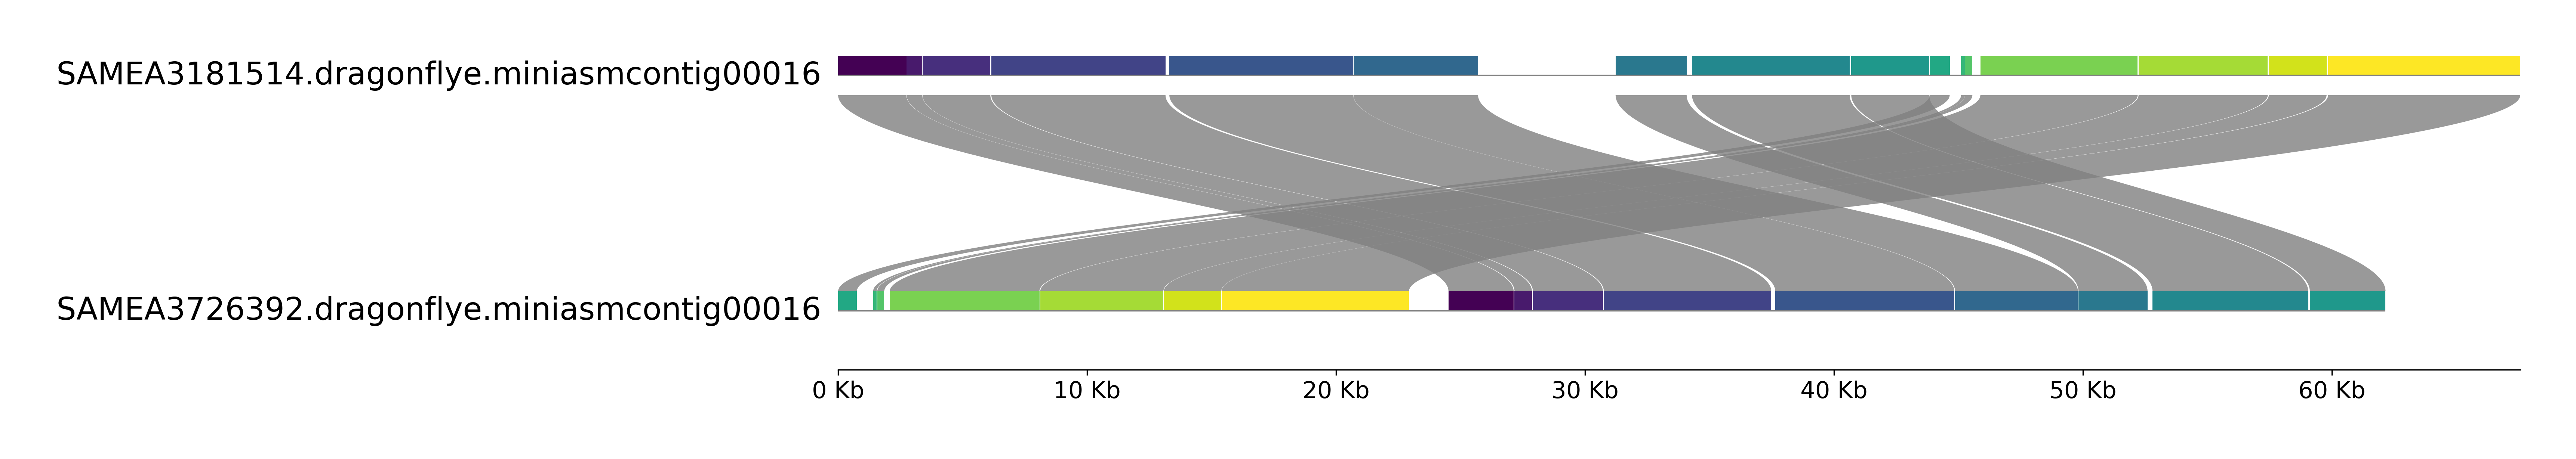

In [2]:
from IPython.display import Image, display
display(Image(filename='./miniasm.contigs.contig00016.pgv-pmauve.output.results.png', embed=True))